In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import binarize
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel('bank.xlsx')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df=df.drop(columns=['age','job','marital','education','default','contact','day','month','poutcome','pdays','previous'],axis=1)
df.head(5)

,balance,housing,loan,duration,campaign,y
0,2143,yes,no,261,1,no
1,29,yes,no,151,1,no
2,2,yes,yes,76,1,no
3,1506,yes,no,92,1,no
4,1,no,no,198,1,no


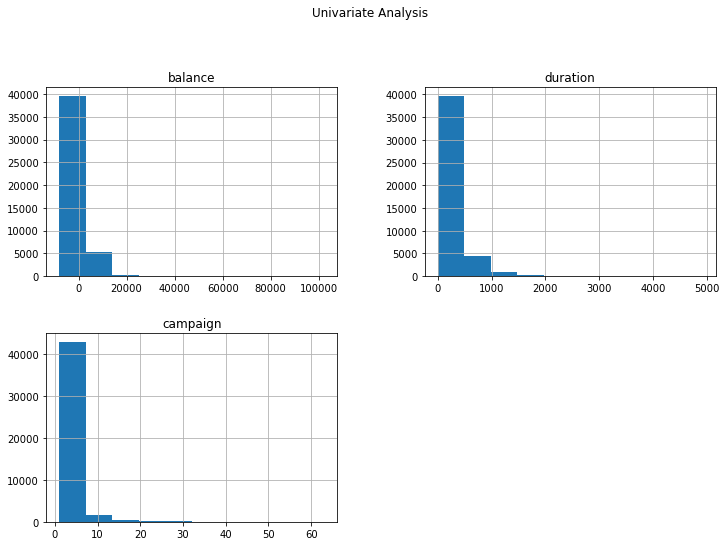

In [11]:
df.hist(figsize=(12, 8))
plt.suptitle('Univariate Analysis', y=1.02)
plt.show()

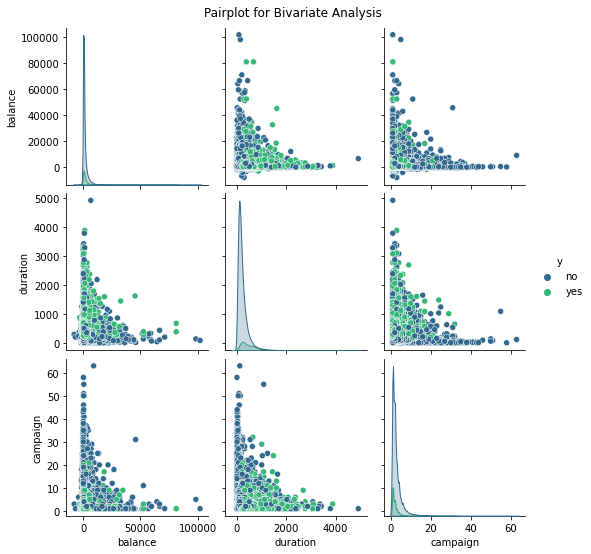

In [12]:
sns.pairplot(df[['balance', 'duration', 'campaign', 'y']], hue='y', palette='viridis')
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()

In [13]:
df.columns

Index(['y', 'balance', 'housing', 'loan', 'duration', 'campaign'], dtype='object')

In [14]:
df=df[['y','balance', 'housing', 'loan', 'duration', 'campaign']]
df.head(1)

,y,balance,housing,loan,duration,campaign
0,no,2143,yes,no,261,1


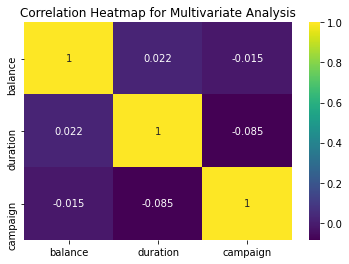

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Multivariate Analysis')
plt.show()

In [16]:
df.shape

(45211, 6)

In [17]:
df = df.dropna()

In [18]:
df.isna().sum()

y           0
balance     0
housing     0
loan        0
duration    0
campaign    0
dtype: int64

In [19]:
lg = LogisticRegression()

In [20]:
df['y'].replace('no','0',inplace=True)
df['y'].replace('yes','1',inplace=True)

df['housing'].replace('no','0',inplace=True)
df['housing'].replace('yes','1',inplace=True)

df['loan'].replace('no','0',inplace=True)
df['loan'].replace('yes','1',inplace=True)

In [21]:
df

,y,balance,housing,loan,duration,campaign
0,0,2143,1,0,261,1
1,0,29,1,0,151,1
2,0,2,1,1,76,1
3,0,1506,1,0,92,1
4,0,1,0,0,198,1
...,...,...,...,...,...,...
45206,1,825,0,0,977,3
45207,1,1729,0,0,456,2
45208,1,5715,0,0,1127,5
45209,0,668,0,0,508,4


In [22]:
df.dtypes

y           object
balance      int64
housing     object
loan        object
duration     int64
campaign     int64
dtype: object

In [23]:
df = df.astype({'loan':'float','housing':'float','y':'float','balance':'float','duration':'float','campaign':'float'})

In [24]:
df.dtypes

y           float64
balance     float64
housing     float64
loan        float64
duration    float64
campaign    float64
dtype: object

In [25]:
x = df.iloc[:,1:]
y = df['y']

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [27]:
xtrain

,balance,housing,loan,duration,campaign
32731,137.0,1.0,0.0,343.0,2.0
1498,830.0,1.0,0.0,246.0,2.0
17532,1103.0,1.0,1.0,148.0,15.0
8166,229.0,1.0,0.0,214.0,2.0
15495,2858.0,1.0,1.0,247.0,5.0
...,...,...,...,...,...
43723,1830.0,0.0,0.0,318.0,3.0
32511,528.0,1.0,0.0,233.0,2.0
5192,4191.0,0.0,0.0,363.0,6.0
12172,1783.0,0.0,0.0,11.0,11.0


In [28]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [29]:
len(xtest)

11303

In [30]:
len(ypred)

11303

In [31]:
print('Actual Y: ', ytest[:250].values)
print('Predict Y:', ypred[:250])

Actual Y:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predict Y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [33]:
print(classification_report(ytest, ypred))
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9998
         1.0       0.56      0.19      0.28      1305

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.61     11303
weighted avg       0.86      0.89      0.86     11303

Confusion Matrix:
 [[9804  194]
 [1058  247]]


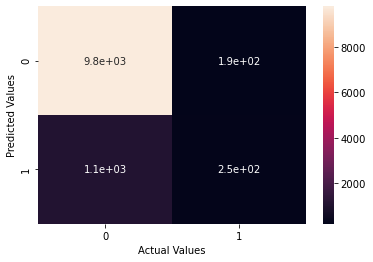

In [34]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:
print(ytest[:250].values)
print(ypred[:250])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

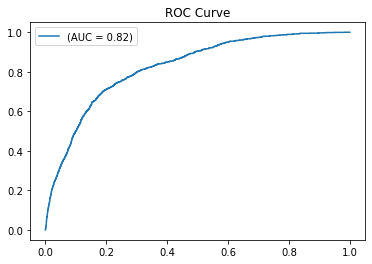

In [37]:
#Threshold selection
proba = lg.predict_proba(xtest)[:,1]
proba = lg.predict_proba(xtest)[:, 1]
auc = roc_auc_score(ytest, proba)
fpr, tpr, threshold = roc_curve(ytest, proba)

plt.plot(fpr, tpr, label='(AUC = %0.2f)' % auc)
plt.legend()
plt.title('ROC Curve')
plt.show()


In [38]:
auc

0.8247581317029689

In [40]:
thresholds = np.linspace(0, 1, 100)
accuracy = []

for i in thresholds:
    y_pred_threshold = binarize([proba], threshold=i)[0]
    accuracy.append(accuracy_score(ytest, y_pred_threshold))


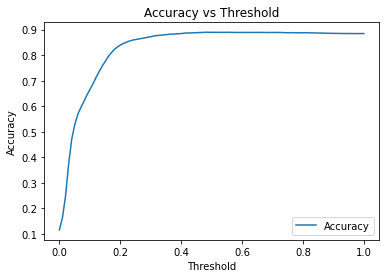

In [41]:
plt.plot(thresholds, accuracy, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')
plt.legend()
plt.show()

In [42]:
final_threshold = pd.DataFrame({'Threshold': thresholds, 'Accuracy': accuracy})
optimal_threshold = final_threshold.loc[final_threshold['Accuracy'].idxmax(), 'Threshold']
print('Optimal Threshold:', optimal_threshold)


Optimal Threshold: 0.5555555555555556


In [43]:
y_pred_optimal = binarize([proba], threshold=optimal_threshold)[0]

In [45]:
print(classification_report(ytest, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9998
         1.0       0.58      0.16      0.25      1305

    accuracy                           0.89     11303
   macro avg       0.74      0.57      0.60     11303
weighted avg       0.86      0.89      0.86     11303

